# Import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the .csv files

In [91]:
monday = pd.read_csv('./datasets/monday.csv', sep=';',parse_dates=['timestamp'])
monday.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [92]:
monday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    4884 non-null   datetime64[ns]
 1   customer_no  4884 non-null   int64         
 2   location     4884 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 114.6+ KB


In [93]:
monday.describe()

,customer_no
count,4884.000000
mean,718.274365
std,411.839636
min,1.000000
25%,366.000000
50%,720.000000
75%,1070.000000
max,1447.000000


In [94]:
monday.shape                                               # shape of the dataset

(4884, 3)

In [95]:
nan_percentage = monday.isnull().sum()/monday.shape[0]*100
nan_percentage                                              # extracting what percent of the data contains null val

timestamp      0.0
customer_no    0.0
location       0.0
dtype: float64

### from the above tabel we see no null values in the dataset 'monday'

### Calculating total number of customers in each section 

In [96]:
section_gby = monday.groupby(by=['location'])['customer_no'].count()
section_gby

location
checkout    1437
dairy        895
drinks       797
fruit       1005
spices       750
Name: customer_no, dtype: int64

### Calculating total number of customers in each section overtime

### create hourley col and groupby customers in different section of the supermarket

In [97]:
monday['hour'] = monday['timestamp'].dt.hour        # creating an hour col 
monday.head(30)

,timestamp,customer_no,location,hour
0,2019-09-02 07:03:00,1,dairy,7
1,2019-09-02 07:03:00,2,dairy,7
2,2019-09-02 07:04:00,3,dairy,7
3,2019-09-02 07:04:00,4,dairy,7
4,2019-09-02 07:04:00,5,spices,7
5,2019-09-02 07:04:00,6,spices,7
6,2019-09-02 07:04:00,7,spices,7
7,2019-09-02 07:04:00,8,fruit,7
8,2019-09-02 07:05:00,1,checkout,7
9,2019-09-02 07:05:00,5,checkout,7


In [98]:
monday.head(20)


,timestamp,customer_no,location,hour
0,2019-09-02 07:03:00,1,dairy,7
1,2019-09-02 07:03:00,2,dairy,7
2,2019-09-02 07:04:00,3,dairy,7
3,2019-09-02 07:04:00,4,dairy,7
4,2019-09-02 07:04:00,5,spices,7
5,2019-09-02 07:04:00,6,spices,7
6,2019-09-02 07:04:00,7,spices,7
7,2019-09-02 07:04:00,8,fruit,7
8,2019-09-02 07:05:00,1,checkout,7
9,2019-09-02 07:05:00,5,checkout,7


In [99]:
#monday['new_customer_ID'] = monday['customer_no'].astype(str)+'m'

In [100]:
#monday.tail()

### groupby hour and location and extracting customer count

In [101]:
hourley_gby = monday.groupby(by=['hour','location'])['customer_no'].count()  #we get multiindex output
hourley_gby

hour  location
7     checkout     92
      dairy        59
      drinks       60
      fruit        54
      spices       52
8     checkout    112
      dairy        68
      drinks       65
      fruit        68
      spices       51
9     checkout     85
      dairy        50
      drinks       57
      fruit        76
      spices       40
10    checkout     90
      dairy        58
      drinks       35
      fruit        47
      spices       52
11    checkout     55
      dairy        36
      drinks       24
      fruit        41
      spices       33
12    checkout     73
      dairy        55
      drinks       37
      fruit        54
      spices       46
13    checkout    120
      dairy        76
      drinks       50
      fruit        95
      spices       71
14    checkout     90
      dairy        58
      drinks       43
      fruit        64
      spices       50
15    checkout     94
      dairy        67
      drinks       48
      fruit        79
      spices     

In [102]:
hourley_gby = hourley_gby.reset_index()     # index resetting

In [103]:
hourley_gby

,hour,location,customer_no
0,7,checkout,92
1,7,dairy,59
2,7,drinks,60
3,7,fruit,54
4,7,spices,52
5,8,checkout,112
6,8,dairy,68
7,8,drinks,65
8,8,fruit,68
9,8,spices,51


### plot of total cusomters per section in the supermarket

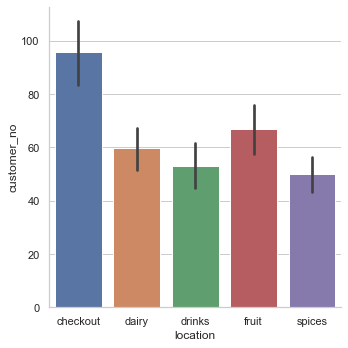

In [104]:
plt = sns.catplot(data = hourley_gby, kind= 'bar', x  = 'location', y = 'customer_no')

### total cusomter in the supermarket over time

<AxesSubplot:xlabel='hour', ylabel='customer_no'>

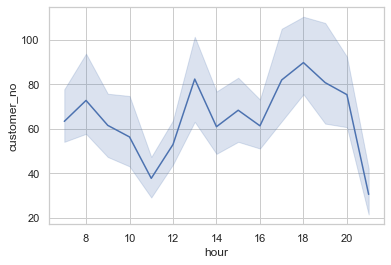

In [105]:
sns.lineplot(data = hourley_gby, x  = 'hour', y = 'customer_no' )

### clearly seen in the above plot that around 8 AM , 1PM and around 6PM there is a peak in the custoemr traffic in the supermarket

# Calculate the total numbers of customers in each section over time

In [106]:
location_gby = hourley_gby.groupby(by = ['location','hour']).mean()
location_gby

customer_no
location hour             
checkout 7            92.0
         8           112.0
         9            85.0
         10           90.0
         11           55.0
         12           73.0
         13          120.0
         14           90.0
         15           94.0
         16           86.0
         17          122.0
         18          128.0
         19          129.0
         20          109.0
         21           52.0
dairy    7            59.0
         8            68.0
         9            50.0
         10           58.0
         11           36.0
         12           55.0
         13           76.0
         14           58.0
         15           67.0
         16           49.0
         17           79.0
         18           87.0
         19           64.0
         20           67.0
         21           22.0
drinks   7            60.0
         8            65.0
         9            57.0
         10           35.0
         11           24.0
         12           37.0
         13           50.0
         14           43.0
         15           48.0
         16           54.0
         17           69.0
         18           81.0
         19           65.0
         20           81.0
         21           28.0
fruit    7            54.0
         8            68.0
         9            76.0
         10           47.0
         11           41.0
         12           54.0
         13           95.0
         14           64.0
         15           79.0
         16           66.0
         17           90.0
         18           83.0
         19           87.0
         20           68.0
         21           33.0
spices   7            52.0
         8            51.0
         9            40.0
         10           52.0
         11           33.0
         12           46.0
         13           71.0
         14           50.0
         15           54.0
         16           52.0
         17           50.0
         18           70.0
         19           59.0
         20           52.0
         21           18.0

In [107]:
location_gby = location_gby.reset_index()
location_gby

,location,hour,customer_no
0,checkout,7,92.0
1,checkout,8,112.0
2,checkout,9,85.0
3,checkout,10,90.0
4,checkout,11,55.0
5,checkout,12,73.0
6,checkout,13,120.0
7,checkout,14,90.0
8,checkout,15,94.0
9,checkout,16,86.0


In [108]:
location_group = location_gby.copy()

In [109]:
location_group

,location,hour,customer_no
0,checkout,7,92.0
1,checkout,8,112.0
2,checkout,9,85.0
3,checkout,10,90.0
4,checkout,11,55.0
5,checkout,12,73.0
6,checkout,13,120.0
7,checkout,14,90.0
8,checkout,15,94.0
9,checkout,16,86.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\l

[(0.0, 200.0)]

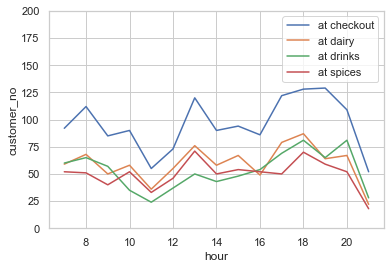

In [110]:

labels = ['checkout','dairy','drinks','fruits','spices']

for lab in labels:
    loc = location_gby[location_gby['location'] =='%s'% lab]
    plot = sns.lineplot(loc['hour'],loc['customer_no'], label='at %s' % lab)
    
plot.set(ylim=(0, 200))

# Displaying number of customers at checkout overtime

    location  hour  customer_no
0   checkout     7         92.0
1   checkout     8        112.0
2   checkout     9         85.0
3   checkout    10         90.0
4   checkout    11         55.0
5   checkout    12         73.0
6   checkout    13        120.0
7   checkout    14         90.0
8   checkout    15         94.0
9   checkout    16         86.0
10  checkout    17        122.0
11  checkout    18        128.0
12  checkout    19        129.0
13  checkout    20        109.0
14  checkout    21         52.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


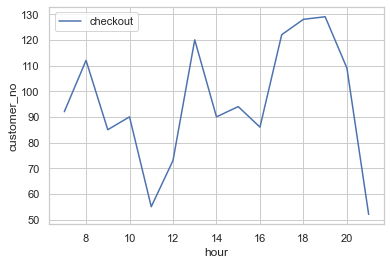

In [111]:
checkout  =location_gby[location_gby['location'] =='checkout']

sns.lineplot(checkout['hour'],checkout['customer_no'], label= 'checkout')

print(checkout)

# Calculate the time each customer spent in the market

In [112]:
monday['min'] = monday['timestamp'].dt.minute

In [113]:
monday.head(10)

,timestamp,customer_no,location,hour,min
0,2019-09-02 07:03:00,1,dairy,7,3
1,2019-09-02 07:03:00,2,dairy,7,3
2,2019-09-02 07:04:00,3,dairy,7,4
3,2019-09-02 07:04:00,4,dairy,7,4
4,2019-09-02 07:04:00,5,spices,7,4
5,2019-09-02 07:04:00,6,spices,7,4
6,2019-09-02 07:04:00,7,spices,7,4
7,2019-09-02 07:04:00,8,fruit,7,4
8,2019-09-02 07:05:00,1,checkout,7,5
9,2019-09-02 07:05:00,5,checkout,7,5


In [114]:
monday['ab_min'] = monday['hour'] *60 + monday['min']
monday.head(20)

,timestamp,customer_no,location,hour,min,ab_min
0,2019-09-02 07:03:00,1,dairy,7,3,423
1,2019-09-02 07:03:00,2,dairy,7,3,423
2,2019-09-02 07:04:00,3,dairy,7,4,424
3,2019-09-02 07:04:00,4,dairy,7,4,424
4,2019-09-02 07:04:00,5,spices,7,4,424
5,2019-09-02 07:04:00,6,spices,7,4,424
6,2019-09-02 07:04:00,7,spices,7,4,424
7,2019-09-02 07:04:00,8,fruit,7,4,424
8,2019-09-02 07:05:00,1,checkout,7,5,425
9,2019-09-02 07:05:00,5,checkout,7,5,425


In [115]:
#customer_by = monday.groupby(by=['customer_no'])['ab_min'].transform(lambda x: x.max() - x.min())

In [117]:
customer_by_apply = monday.groupby(by=['customer_no'])['ab_min'].apply(lambda x: x.max() - x.min())

In [119]:
customer_by_apply

customer_no
1        2
2        3
3        2
4        4
5        1
6       25
7        9
8        3
9        7
10       2
11       2
12       4
13      10
14       3
15       5
16       4
17      11
18       5
19       8
20       2
21       3
22       4
23       1
24       6
25       6
26       8
27      17
28       3
29       2
30       6
31       1
32       3
33      16
34      10
35       4
36       1
37       4
38       7
39       1
40       4
41       7
42      18
43      17
44       1
45      29
46       1
47       9
48       1
49       1
50       4
51       5
52      10
53       3
54       7
55       5
56      10
57       1
58       2
59       9
60       3
61       8
62       5
63       9
64       5
65       7
66       7
67       6
68      10
69       1
70       5
71       8
72       9
73       1
74       3
75       7
76       7
77       8
78       4
79      10
80      15
81       2
82       5
83       2
84      14
85       2
86      23
87       1
88       8
89       1
90       

In [120]:
customer_by = pd.DataFrame(customer_by_apply)
customer_by.reset_index(inplace=True)
pd.set_option('display.max_rows',customer_by.shape[0]+1)
#customer_by.head(5)

In [121]:
customer_by

,customer_no,ab_min
0,1,2
1,2,3
2,3,2
3,4,4
4,5,1
5,6,25
6,7,9
7,8,3
8,9,7
9,10,2


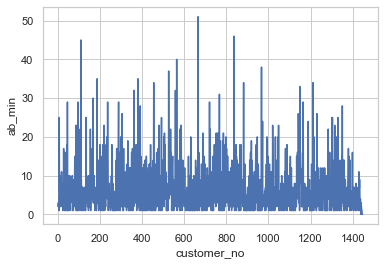

In [122]:
sns.set_theme(style="whitegrid")
g = sns.lineplot(data = customer_by, x = 'customer_no', y = 'ab_min')